<a href="https://colab.research.google.com/github/nestorm94/IHPC_2023_1/blob/main/taller2_Nestor_Morales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Juan Lara
<br>
<i><b>Asignatura:</b></i> Introducción Métricas de rendimiento HPC
<br>
<i><b>Estudiante:</b></i> Nestor Morales.
<br>
<i><b>Tema:</b></i> Taller 2 corte 2
<br>
<br>
22/04/2023
<br>
</FONT>
</div>


# Taller 2: Intro a HPC
---

Este taller busca evaluar conceptos de modelamiento y la implementación de métricas de desempeño para la evaluación de modelos de Machine Learning supervisados.

- **Fecha de entrega**: 23 de Abril de 2023
- **Enlace de entrega**: https://forms.gle/PDZiWqZ5z4XMaSy39

Librerías:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from numpy.typing import ArrayLike
from typing import Tuple
from IPython.display import display
import seaborn as sns
from sklearn.metrics import classification_report


## **1. Carga de Datos**
---

En este caso trabajáremos con el conjunto de datos [Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv) de Kaggle, vamos a descargarlo:

In [ ]:
!wget 'https://drive.google.com/uc?export=view&id=1djX2CPMY-O_vskg9ey326auY8Yho415v' -O heart_failure.zip
!unzip heart_failure.zip

--2023-04-22 23:49:50--  https://drive.google.com/uc?export=view&id=1djX2CPMY-O_vskg9ey326auY8Yho415v
Resolving drive.google.com (drive.google.com)... 74.125.197.102, 74.125.197.113, 74.125.197.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.197.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/htoaok7g5vo0bcakh5fnuh7j81m6uecg/1682207325000/16848862265445619282/*/1djX2CPMY-O_vskg9ey326auY8Yho415v?e=view&uuid=b5029f1f-2e6f-4a91-ae57-c8658d6c1071 [following]
--2023-04-22 23:49:51--  https://doc-10-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/htoaok7g5vo0bcakh5fnuh7j81m6uecg/1682207325000/16848862265445619282/*/1djX2CPMY-O_vskg9ey326auY8Yho415v?e=view&uuid=b5029f1f-2e6f-4a91-ae57-c8658d6c1071
Resolving doc-10-4g-docs.googleusercontent.com (doc-10-4g-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c0

Cargamos el conjunto de datos:

In [ ]:
data = pd.read_csv("heart.csv")
display(data.head())

## **2. Análisis Exploratorio**
---

En este punto deberá explorar y entender el conjunto de datos y sus elementos.

- ¿Cuántas columnas tiene el conjunto de datos, qué significa cada una?

Tiene 14 columnas  y cada columna del conjunto de datos tiene el siguiente significado:

* index: Identificador único de cada registro.
* age: Edad del paciente.
* sex: Género del paciente (0 = femenino, 1 = masculino).
* cp: Tipo de dolor de pecho (0 = típico angina, 1 = angina atípica, 2 = dolor no anginoso, 3 = asintomático).
* trtbps: Presión arterial en reposo (en mm Hg).
* chol: Colesterol sérico (en mg/dl).
* fbs: Nivel de azúcar en sangre en ayunas > 120 mg/dl (1 = verdadero, 0 = falso).
* restecg: Resultados electrocardiográficos en reposo (0 = normal, 1 = anormalidad de la onda ST-T, 2 = hipertrofia ventricular izquierda probable o definitiva).
* thalachh: Frecuencia cardíaca máxima alcanzada.
* exng: Angina inducida por ejercicio (1 = sí, 0 = no).
* oldpeak: Depresión del ST inducida por el ejercicio en relación con el reposo.
* slp: Pendiente del segmento ST de ejercicio máximo (0 = pendiente descendente, 1 = plana, 2 = pendiente ascendente).
* caa: Número de vasos principales coloreados por flourosopía.
* thall: Resultados de la prueba de talio (0 = normal, 1 = defecto fijo, 2 = defecto reversible).
* output: Diagnóstico de enfermedad cardíaca (0 = no, 1 = sí).
Es importante tener en cuenta que los valores en las columnas sex, fbs, exng, slp, caa, thall y output son valores binarios (0 o 1), mientras que los valores en las otras columnas son valores numéricos.

Implemente una función que permita determinar si una columna es continúa o categórica (puede guiarse por el número de elementos únicos que tenga cada columna):

In [ ]:
def continuous_or_categoric(data: pd.DataFrame, column: str) -> bool:
    unique_values = data[column].nunique()

    if unique_values >= (len(data[column]) * 0.05):
        is_continuous = True # La columna es continua .
    else:
        is_continuous = False # La columna es categórica.
    return is_continuous

Use la siguiente celda para probar su código (puede cambiar el nombre de la variable).

In [ ]:
display(continuous_or_categoric(data, "age"))

True

- ¿Cómo es la distribución de las columnas?

Para esto debe implementar la función `show_distribution` la cual debe graficar un diagrama de tipo [kernel density estimation](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) para las variables continuas y un diagrama de barras para las variables categóricas:

In [ ]:

# Obtener estadísticas descriptivas de las columnas numéricas
print(data.describe())

# Contar los valores únicos en las columnas categóricas
print("Sexo:")
print(data["sex"].value_counts())
print("Tipo de dolor de pecho:")
print(data["cp"].value_counts())
print("Nivel de azúcar en sangre en ayunas > 120 mg/dl:")
print(data["fbs"].value_counts())
print("Resultados electrocardiográficos en reposo:")
print(data["restecg"].value_counts())
print("Angina inducida por ejercicio:")
print(data["exng"].value_counts())
print("Pendiente del segmento ST de ejercicio máximo:")
print(data["slp"].value_counts())
print("Número de vasos principales coloreados por flourosopía:")
print(data["caa"].value_counts())
print("Resultados de la prueba de talio:")
print(data["thall"].value_counts())
print("Diagnóstico de enfermedad cardíaca:")
print(data["output"].value_counts())


              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [ ]:
def show_distribution(data: pd.DataFrame):
    """
    Esta función muestra la distribución de las variables en el conjunto de datos.

    Parameters
    ----------
    data : pd.DataFrame
        Conjunto de datos.
    """
    # Obtener las columnas numéricas y categóricas
    num_cols = data.select_dtypes(include=["float64", "int64"]).columns.tolist()
    cat_cols = data.select_dtypes(include=["object", "bool"]).columns.tolist()

    # Mostrar la distribución de las columnas numéricas
    for col in num_cols:
        sns.kdeplot(data[col])
        plt.title(f"Distribución de {col}")
        plt.show()

    # Mostrar la distribución de las columnas categóricas
    for col in cat_cols:
        sns.countplot(data[col])
        plt.title(f"Distribución de {col}")
        plt.show()


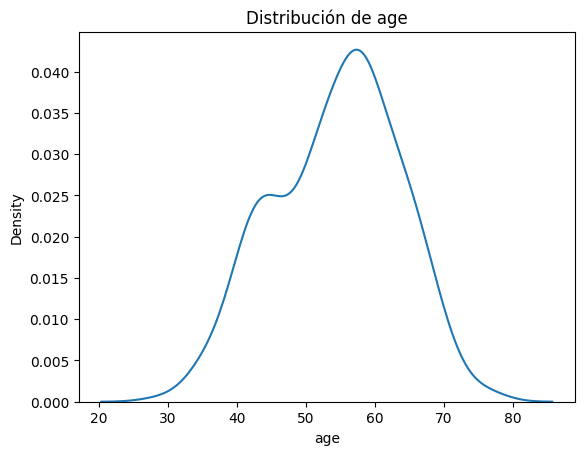

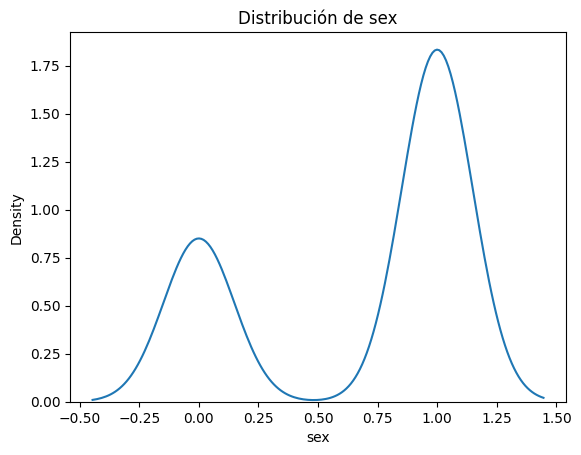

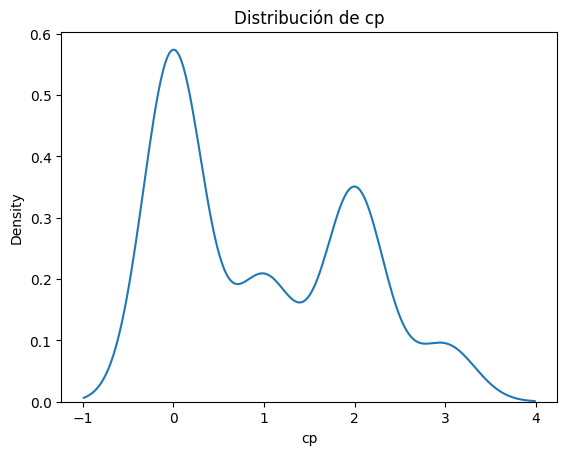

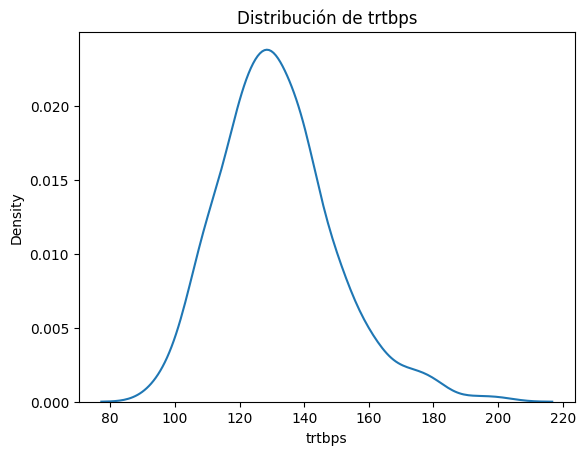

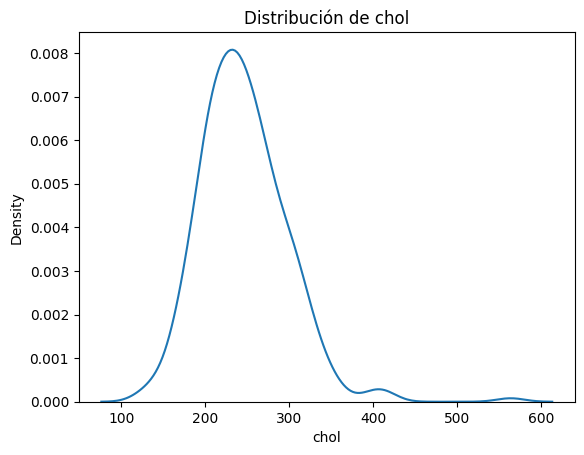

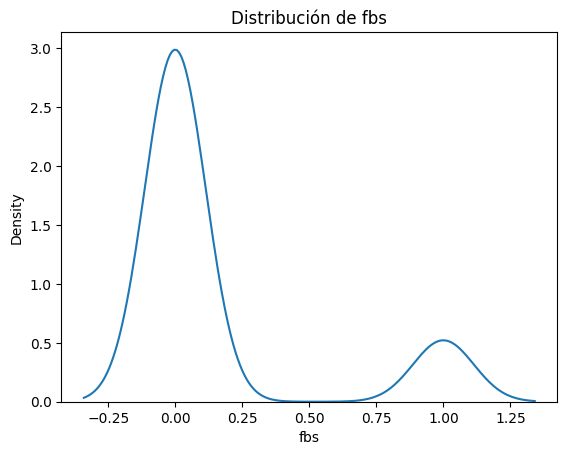

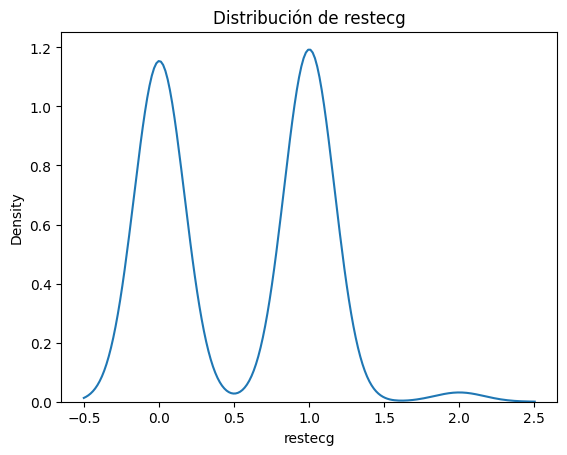

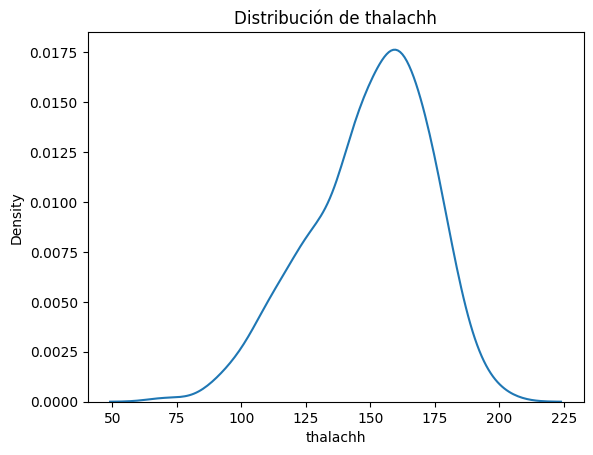

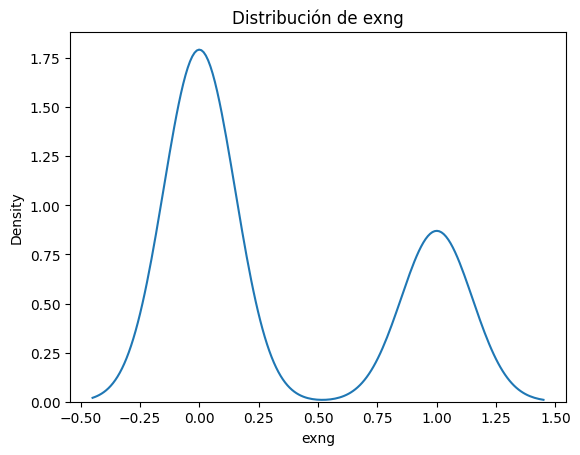

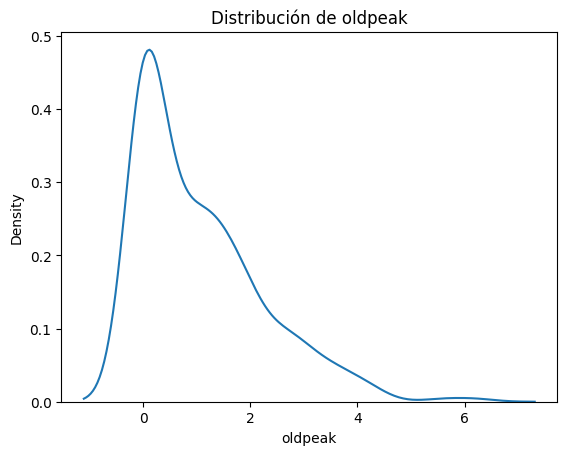

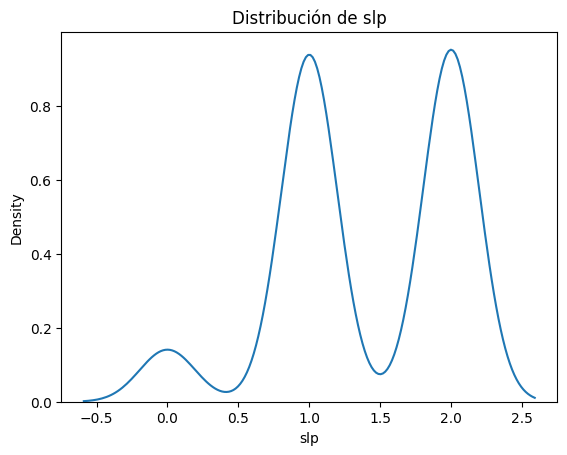

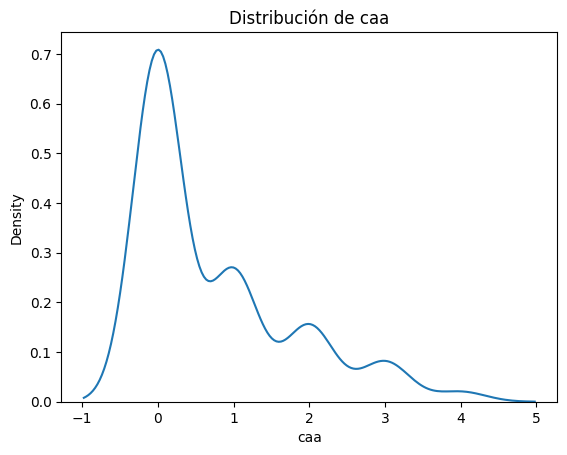

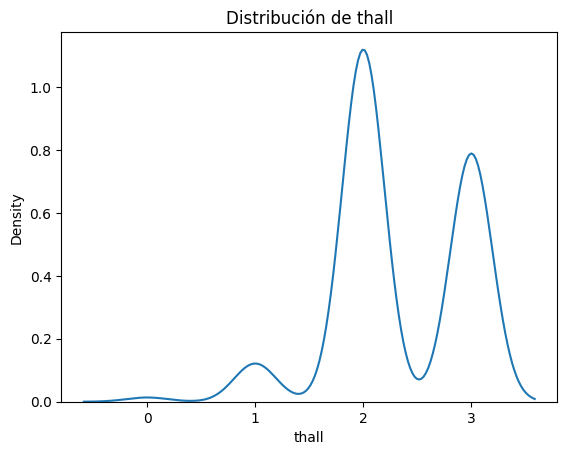

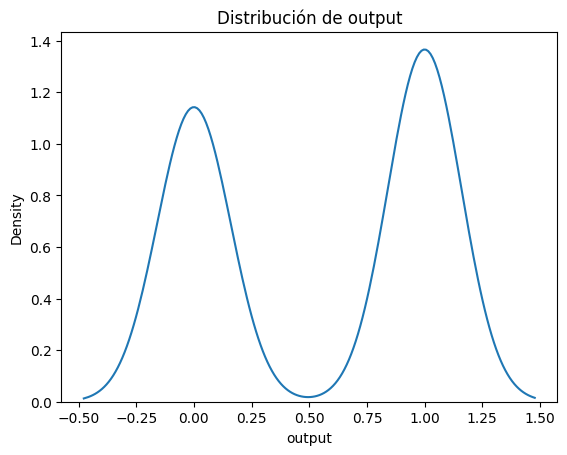

In [ ]:
fig = show_distribution(data)
plt.show()

In [ ]:
def show_distribution(data: pd.DataFrame, column: str) -> plt.Figure:
   # Verificar si la columna es categórica o continua
    if data[column].dtype == 'object':
        # Diagrama de barras para variables categóricas
        fig = sns.countplot(data=data, x=column)
    else:
        # Diagrama KDE para variables continuas
        fig = sns.kdeplot(data=data, x=column)

    return fig

Utilice la siguiente celda para probar su código:

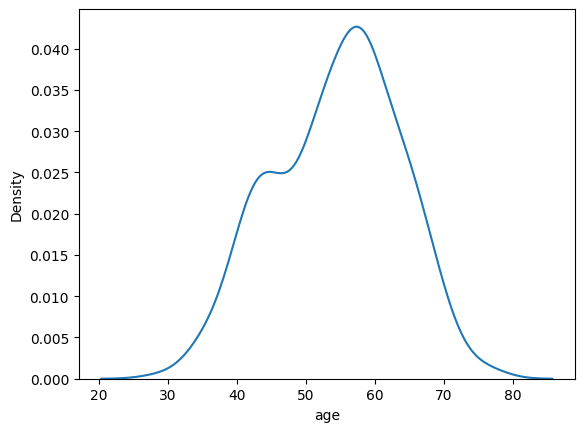

In [ ]:
fig = show_distribution(data, "age")
plt.show()


- ¿Cuáles son las variables independientes y cuál es la variable dependiente?

Para esto debe implementar la función `target_variable` la cual debe separar las columnas que se tomarán como variables independientes de la columna objetivo.

In [ ]:
def target_variable(data: pd.DataFrame) -> Tuple[pd.DataFrame, pd.Series]:
    # obtener las variables independientes (todas las columnas excepto la última)
    features = data.iloc[:, :-1]
    # obtener la variable dependiente (última columna)
    labels = data.iloc[:, -1]
    return features, labels

Utilice la siguiente celda para probar su código:

In [ ]:
features, labels = target_variable(data)

In [ ]:
print(features)
print(labels)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2

## **3. Preprocesamiento**
---

En este punto debe implementar una función para preprocesar el conjunto de datos. debe aplicar una transformación de tipo `min_max` sobre los datos (cada columna debe estar entre 0 y 1):

$$
x_{minmax} = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}
$$

Puede utilizar la clase `MinMaxScaler` de `sklearn`. Adicionalmente, debe convertir las etiquetas a un arreglo de `numpy`.

In [ ]:

def preprocess(features: pd.DataFrame, labels: pd.Series) -> Tuple[np.ndarray, np.ndarray]:
    scaler = MinMaxScaler()
    # escalar los datos de las características
    features_p = scaler.fit_transform(features)
    # convertir las etiquetas a un arreglo de numpy
    labels_p = labels.to_numpy()
    return features_p, labels_p

Utilice la siguiente celda para probar su código:

In [ ]:
features_p, labels_p = preprocess(features, labels)


In [ ]:
print(features_p)
print(labels_p)

[[0.70833333 1.         1.         ... 0.         0.         0.33333333]
 [0.16666667 1.         0.66666667 ... 0.         0.         0.66666667]
 [0.25       0.         0.33333333 ... 1.         0.         0.66666667]
 ...
 [0.8125     1.         0.         ... 0.5        0.5        1.        ]
 [0.58333333 1.         0.         ... 0.5        0.25       1.        ]
 [0.58333333 0.         0.33333333 ... 0.5        0.25       0.66666667]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

## **4. Modelamiento**
---

Para entrenar el modelo, dividimos el conjunto de datos en las particiones de entrenamiento y prueba:

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
features_train, features_test, labels_train, labels_test = train_test_split(
    features_p, labels_p, stratify=labels_p, test_size=0.3
)

In [ ]:
print(features_train)
print("---------------")
print(features_test)
print("-------------")
print(labels_train)
print("-------------")
print( labels_test)

[[0.70833333 1.         0.         ... 1.         0.75       1.        ]
 [0.4375     0.         0.         ... 1.         0.         0.66666667]
 [0.625      1.         0.         ... 1.         0.25       1.        ]
 ...
 [0.75       0.         0.66666667 ... 1.         0.25       0.66666667]
 [0.3125     1.         0.33333333 ... 1.         0.         0.66666667]
 [0.70833333 0.         0.66666667 ... 1.         0.         0.66666667]]
---------------
[[0.39583333 1.         0.66666667 ... 1.         0.5        0.66666667]
 [0.3125     1.         0.         ... 1.         0.25       0.66666667]
 [0.85416667 1.         0.         ... 0.5        0.75       0.66666667]
 ...
 [0.52083333 0.         0.33333333 ... 1.         0.25       0.66666667]
 [0.5        0.         0.66666667 ... 1.         0.         0.        ]
 [0.5625     1.         0.66666667 ... 0.5        0.25       0.33333333]]
-------------
[0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0
 0 1 1 

Para el modelo necesitamos optimizar una función de pérdida conocida como la entropía binaria cruzada':

$$
\mathcal{L} = - \frac{1}{N} \sum_{i=1} ^ N y_i \log{\tilde{y}_i} + (1 - y_i) \log{(1 - \tilde{y}_i)}
$$

Debe implementar esta función:

In [ ]:
def binary_crossentropy(y: ArrayLike, y_pred: ArrayLike) -> ArrayLike:
 # calcular la entropía binaria cruzada
    value = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return value

Utilice las siguientes celdas para probar su código:

In [ ]:
y = np.array([0., 0])
y_pred = np.array([0.01, 0.01])
# Debe dar un valor bajo al ser valores parecidos
print(binary_crossentropy(y, y_pred))

0.01005033585350145


In [ ]:
y = np.array([1., 1.])
y_pred = np.array([0.99, 0.99])
# Debe dar un valor bajo al ser valores parecidos
print(binary_crossentropy(y, y_pred))

0.01005033585350145


In [ ]:
y = np.array([0., 0.])
y_pred = np.array([0.99, 0.99])
# Debe dar un valor alto al ser valores distintos
print(binary_crossentropy(y, y_pred))

4.605170185988091


In [ ]:
y = np.array([1., 1.])
y_pred = np.array([0.01, 0.01])
# Debe dar un valor alto al ser valores distintos
print(binary_crossentropy(y, y_pred))

4.605170185988091


Ahora, debe implementar un modelo de regresión logistica:

$$
\tilde{\mathbf{y}} = \frac{1}{1 + e^{\mathbf{X}\cdot\mathbf{w}}}
$$

Donde $\mathbf{X}$ corresponde a la matriz de características de entrenamiento, $\mathbf{w}$ es el vector de parámetros y $\tilde{\mathbf{y}}$ es la estimación del modelo.

> **Nota**: recuerde agregar una columna de unos para considerar el intercepto. El entrenamiento del modelo debe realizarse optimizando la entropía binaria cruzada, puede utilizar la función `optimize` de `scipy` para esto.

In [ ]:
from typing import Union

class LogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
    def fit(self, X: Union[np.ndarray, list], y: Union[np.ndarray, list]) -> "LogisticRegression":
      
        # convertir los datos a numpy arrays
        X = np.array(X)
        y = np.array(y)

        # agregar una columna de unos a los datos de características para el término de sesgo
        X = np.c_[np.ones((X.shape[0], 1)), X]

        # inicializar los parámetros
        self.w = np.zeros(X.shape[1])

        # iterar para ajustar los parámetros
        for i in range(self.n_iterations):
            # calcular la salida del modelo
            y_pred = self._sigmoid(np.dot(X, self.w))

            # calcular el error
            error = y_pred - y

            # actualizar los parámetros
            self.w -= self.learning_rate * np.dot(X.T, error) / len(y)

        return self


    def predict_proba(self, X: Union[np.ndarray, list]) -> np.ndarray:
 
        # convertir los datos a numpy arrays
        X = np.array(X)

        # agregar una columna de unos a los datos de características para el término de sesgo
        X = np.c_[np.ones((X.shape[0], 1)), X]

        # calcular la salida del modelo
        y_pred = self._sigmoid(np.dot(X, self.w))

        # calcular las probabilidades
        probs = np.column_stack((1 - y_pred, y_pred))

        return probs

    def predict(self, X: Union[np.ndarray, list]) -> np.ndarray:
  
        # convertir los datos a numpy arrays
        X = np.array(X)

        # agregar una columna de unos a los datos de características para el término de sesgo
        X = np.c_[np.ones((X.shape[0], 1)), X]

        # calcular la salida del modelo
        y_pred = self._sigmoid(np.dot(X, self.w))
      
        # redondear la predicción a la clase más probable (0 o 1)
        y_pred = np.round(y_pred)

        return y_pred

    def _sigmoid(self, z: Union[np.ndarray, list]) -> np.ndarray:
        result = 1 / (1 + np.exp(-z))
        return result
    

Entrenamos el modelo:

In [ ]:
model = LogisticRegression().fit(features_train, labels_train)

## **5. Evaluación**
---

Obtenga las predicciones del modelo:

In [ ]:
x_test = np.linspace(-1, 1, 3).reshape(-1, 1)

In [ ]:
y_pred = model.predict(features_test)

In [ ]:
y_pred

array([1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0.])

Utilice la función `classification_report` para validar el desempeño del modelo.

In [ ]:

y_pred = y_pred.astype(int)

# Obtener las predicciones del modelo
y_pred = model.predict(features_test)

# Generar el reporte de clasificación
report = classification_report(labels_test, y_pred)

# Imprimir el reporte
print(report)


              precision    recall  f1-score   support

           0       0.94      0.78      0.85        41
           1       0.84      0.96      0.90        50

    accuracy                           0.88        91
   macro avg       0.89      0.87      0.88        91
weighted avg       0.89      0.88      0.88        91

